# **Lab 4: Random Forest & ExtraTrees**

During the fourth lecture, you have been introduced to Random Forest and ExtraTrees. In this lab, we will see how to train such models using sklearn.


## Exercise 1: Binary Classification with Random Forest

We are going to use a modified version of the dataset from UCI Machine Learning Repository which contains the income census data for 30718 americans (https://archive.ics.uci.edu/ml/datasets/Adult).

The columns are:
1.   AGE: age of the person.
2.   WORKCLASS: class of work.
3.   EDUCATION_NUM: numeric education level.
4.   MARITAL_STATUS: marital status  of the person.
5.   OCCUPATION: occupation  of the person.
6.   RELATIONSHIP: type of relationship.
7.   gender: sex of the person.
8.   HOURS_PER_WEEK: average number of hour working per week.
9.   INCOME: income level (<=50K or >50K).


We want to predict whether an individual will earn more or less than $50,000 per year (**"income"**). This is a binary classification problem.

The steps are:
1.   Load and explore dataset
2.   Prepare Data
3.   Split Data
4.   Assess Baseline Model
5.   Train Initial RandomForest with Default Hyperparameter
6.   Reduce Overfitting with n_estimators
7.   Reduce Overfitting with max_depth
8.   Reduce Overfitting with min_samples_leaf
9.   Reduce Overfitting with max_features
10.  Features Importance

### 1. Load and Explore Dataset

**[1.1]** Let's install specific version of the packages to be used

In [ ]:
#!pip install numpy==1.18.5
#!pip install pandas==1.0.5
#!pip install scikit-learn=="0.22.2.post1"
#!pip install altair==4.1.0

**[1.2]** Task: Import the pandas and numpy package

In [ ]:
# Placeholder for student's code (2 line of code)
# Task: Import the pandas and numpy package

In [1]:
# Solution
import pandas as pd
import numpy as np

**[1.3]** Task: Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called df

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: load the dataset into dataframe called df

In [2]:
# Solution

df = pd.read_csv('adult.csv')

**[1.4]** Task: Display the first 5 rows of df

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the first 5 rows of df

In [3]:
# Solution
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df=df.drop(['fnlwgt','education','capital-gain','capital-loss','native-country','race'],axis=1)

In [5]:
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Male,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,Male,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,Male,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,>50K
4,18,?,10,Never-married,?,Own-child,Female,30,<=50K


In [6]:
df.tail()

,age,workclass,educational-num,marital-status,occupation,relationship,gender,hours-per-week,income
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,Female,38,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,Female,40,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,Male,20,<=50K
48841,52,Self-emp-inc,9,Married-civ-spouse,Exec-managerial,Wife,Female,40,>50K


**[1.5]** Task: Display the dimensions (shape) of df

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Task: Display the dimensions (shape) of df

In [7]:
# Solution
df.shape

(48842, 9)

We can see that the dataframe contains 30718 rows and 9 columns.

**[1.6]** Task: Display the summary (info) of df

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the summary (info) of df

In [8]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   relationship     48842 non-null  object
 6   gender           48842 non-null  object
 7   hours-per-week   48842 non-null  int64 
 8   income           48842 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.4+ MB


**[1.7]** Task: Display the descriptive statictics of df


In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the descriptive statictics of df

In [9]:
# Solution
df.describe()

,age,educational-num,hours-per-week
count,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382
std,13.710510,2.570973,12.391444
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


### 2. Prepare Data

**[2.1]** Task: Create a copy of df and save it into a variable called df_cleaned


In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Create a copy of df and save it into a variable called df_cleaned

In [10]:
# Solution
df_cleaned = df.copy()

We need to encode the 5 categorical columns, for that we will use the one hot encoding strategy.

**[2.3]** Task: Create a variable called cat_list containing the following items: 'workclass','marital_status','occupation','relationship','sex'

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Create a variable called cat_list containing the following items: 'workclass','marital_status','occupation','relationship','sex'

In [11]:
# Solution
cat_cols = ['workclass','marital-status','occupation','relationship','gender']

**[2.4]** Task: One hot encode the categorical columns by using the "get_dummies" function from pandas

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: One hot encode the categorical columns by using the "get_dummies" function from pandas

In [12]:
# Solution
df_cleaned = pd.get_dummies(df_cleaned, columns=cat_cols)

In [13]:
df_cleaned

,age,educational-num,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Female,gender_Male
0,25,7,40,<=50K,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,38,9,50,<=50K,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,28,12,40,>50K,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,44,10,40,>50K,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,18,10,30,<=50K,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,38,<=50K,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,True,False
48838,40,9,40,>50K,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
48839,58,9,40,<=50K,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
48840,22,9,20,<=50K,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True


In [14]:
df_cleaned.columns

Index(['age', 'educational-num', 'hours-per-week', 'income', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Tran

**[2.5]** Task: Display the first 5 rows of df_cleaned

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the first 5 rows of df_cleaned

In [15]:
# Solution
df_cleaned.head()

,age,educational-num,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Female,gender_Male
0,25,7,40,<=50K,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,38,9,50,<=50K,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,28,12,40,>50K,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,44,10,40,>50K,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,18,10,30,<=50K,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


We can see that all the categorical colums have been transformed.


**[2.6]** Task : Split the target (X) and the features (Y)

In [ ]:
# Placeholder for student's code (1 line of code)
# Task : Split the target (X) and the features (Y)

In [16]:
# Solution
X = df_cleaned.drop('income', axis=1)
y = df_cleaned['income']

## 3. Split Data

**[3.1]** Task: Print the frequencies of each value of the target
variable

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the number of occurence for each value of the target variable

In [17]:
# Solution
y.value_counts(normalize=True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64


**[3.2]** Task: Import train_test_split from sklearn.model_selection

In [ ]:
# Placeholder for student's code (1 line of code)
# Import train_test_split from sklearn.model_selection

In [18]:
# Solution
from sklearn.model_selection import train_test_split

**[3.3]** Task: Split randomly the dataset with random_state=8 into 2 different sets: data (80%) and test (20%)

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Task: Split randomly the dataset with random_state=8 into 2 different sets: data (80%) and test (20%)

In [19]:
# Solution
X_data, X_test, y_data, y_test = train_test_split (X, y, test_size=0.2, random_state=8)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

**[3.4]** Task: Print the frequencies of each value of the testing target

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the frequencies of each value of the testing target

In [20]:
# Solution
y_test.value_counts(normalize=True)

income
<=50K    0.764459
>50K     0.235541
Name: proportion, dtype: float64

**[3.5]** Task: Split the data randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Split the data randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)

In [ ]:
# Solution


## 4. Assess Baseline Model
Before building our models, we need to calculate the Baseline score (null-accuracy) in order to evaluate if our models will be useful.

**[4.1]** Task: Find the mode of the target variable from the training set and print its value

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Find the mode of the target variable and print its value

In [21]:
# Solution
y_mode = y_train.mode()
y_mode

0    <=50K
Name: income, dtype: object

**[4.2]** Task: Create a numpy array with the same dimensions as for the training set called y_base filled with this value



In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Create a numpy array with the same dimensions as for the training set called y_base filled with this value

In [22]:
# Solution
y_shape = (len(X_train), 1)
y_base = np.full(y_shape, y_mode)

**[4.3]** Task: Import the accuracy score from sklearn

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import the accuracy score from sklearn

In [23]:
# Solution
from sklearn.metrics import accuracy_score

**[4.4]** Task: Display the accuracy score of this baseline model on the training set

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the accuracy score of this baseline model on the training set

In [24]:
# Solution
accuracy_score(y_train, y_base)

0.7597095143643228

## 5. Train Initial RandomForest with Default Hyperparameter

**[5.1]** Task: Import the RandomForestClassifier from sklearn.ensemble

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Import the RandomForestClassifier from sklearn.ensemble

In [25]:
# Solution
from sklearn.ensemble import RandomForestClassifier

**[5.2]** Task: Instantiate the RandomForestClassifier class called rf1 with a random state=8

In [ ]:
# Placeholder for student's code (2 line of code)
# Task: Instantiate the RandomForestClassifier class called rf1 with a random state=8

In [26]:
# Solution
rf1 = RandomForestClassifier(random_state=8)

We will keep the same random state equal to 8 during the entire exercice.

**[5.3]** Task: Fit the RandomForest model

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Task: Fit the RandomForest model

In [27]:
# Solution
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

**[5.4]** Task: Calculate the accuracy of the RandomForest on the training and validation sets and print them

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Calculate the accuracy of the RandomForest and ExtraTree models on the testing set and store them into two variables called rf1_acc_test and et1_acc_test

In [28]:
# Solution
print(rf1.score(X_train, y_train))
print(rf1.score(X_val, y_val))

0.9598822701388444
0.8158669225847729


The model is overfitting but it is perfoming better than the baseline (null-accuracy).

## 6. Reduce Overfitting with n_estimators

Let's explore the "n_estimators" hyperparameter for the RandomForest model.

**[6.1]** Task: Train a RandomForestClassifier model with n_estimators=50 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50 and print the accuracy score for the training and validation sets

In [29]:
# Solution
rf2 = RandomForestClassifier(random_state=8, n_estimators=50).fit(X_train, y_train)
print(rf2.score(X_train, y_train))
print(rf2.score(X_val, y_val))

0.9594023929873953
0.8170185540627


**[6.2]** Task: Train a RandomForestClassifier model with n_estimators=200 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=200 and print the accuracy score for the training and validation sets

In [30]:
# Solution
rf2 = RandomForestClassifier(random_state=8, n_estimators=200).fit(X_train, y_train)
print(rf2.score(X_train, y_train))
print(rf2.score(X_val, y_val))

0.959914261948941
0.8152271273192578


Increasing the number of trees don't seem to impact the performance of the model. The higher this number, the longer the model needs to train. So we will keep the lowest value: 50

## 7. Reduce Overfitting with max_depth

Now let's look at the "**max_depth**" hyperparamaters which by default doesn't have any constraints.

**[7.1]** Let's print the average "**max_depth**" for rf2:

In [31]:
np.mean([estimator.tree_.max_depth for estimator in rf2.estimators_])

np.float64(40.06)

Each tree can have a different value for max_depth. On average this value is 37.4 for our model.

**[7.2]** Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=10 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=10 and print the accuracy score for the training and validation sets

In [32]:
# Solution
rf3 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=10).fit(X_train, y_train)
print(rf3.score(X_train, y_train))
print(rf3.score(X_val, y_val))

0.8464073197261501
0.8341650671785029


**[7.3]** Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=20 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=20 and print the accuracy score for the training and validation sets

In [33]:
# Solution
rf4 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=20).fit(X_train, y_train)
print(rf4.score(X_train, y_train))
print(rf4.score(X_val, y_val))

0.9239874592104421
0.8348048624440179


**[7.4]** Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15 and print the accuracy score for the training and validation sets

In [34]:
# Solution
rf5 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15).fit(X_train, y_train)
print(rf5.score(X_train, y_train))
print(rf5.score(X_val, y_val))

0.881918228933393
0.837236084452975


The model that overfits the less is rf3. It achieved an accuracy score of around 0.84. The rf5 model got highest score for the training but it is still overfitting. Let's try to reduce overfitting for this model.


## 8.   Reduce Overfitting with min_samples_leaf

Now let's look at the "**min_samples_leaf**" hyperparamaters which by default is equal to 1.

**[8.1]** Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2 and print the accuracy score for the training and validation sets

In [35]:
# Solution
rf6 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2).fit(X_train, y_train)
print(rf6.score(X_train, y_train))
print(rf6.score(X_val, y_val))

0.8621792821037815
0.8391554702495202


**[8.2]** Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=10 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=10 and print the accuracy score for the training and validation sets

In [36]:
# Solution
rf7 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=10).fit(X_train, y_train)
print(rf7.score(X_train, y_train))
print(rf7.score(X_val, y_val))

0.8449037046516091
0.8345489443378119


**[8.3]** Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=5 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=5 and print the accuracy score for the training and validation sets

In [37]:
# Solution
rf8 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=5).fit(X_train, y_train)
print(rf8.score(X_train, y_train))
print(rf8.score(X_val, y_val))

0.8509181649497729
0.8374920025591811


The rf7 model got very similar accuracy score for the training and validation sets: around 0.83. But rf6 one got better score and is slightly overfitting. Let's see if can improve this situation.

## 9.   Reduce Overfitting with max_features

Now let's look at the "**max_features**" hyperparamaters which by default is equal to the square root of the number of features in a classification whereas it is equal to the number of feaures in a regression. Setting "**max_features**" to "None" means that "**max_features**" will be equal to the number of features.



**[9.1]** Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=2 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=2 and print the accuracy score for the training and validation sets

In [38]:
# Solution
rf9 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=2).fit(X_train, y_train)
print(rf9.score(X_train, y_train))
print(rf9.score(X_val, y_val))

0.8487107300531064
0.8335252719129879


**[9.2]** Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=5 and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=5 and print the accuracy score for the training and validation sets

In [39]:
# Solution
rf10 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=5).fit(X_train, y_train)
print(rf10.score(X_train, y_train))
print(rf10.score(X_val, y_val))

0.8595239618657624
0.837619961612284


**[9.3]** Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=None and print the accuracy score for the training and validation sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Train a RandomForestClassifier model with n_estimators=50, max_depth=15, min_samples_leaf=None, max_features=2 and print the accuracy score for the training and validation sets

In [40]:
# Solution
rf11 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15, min_samples_leaf=2, max_features=None).fit(X_train, y_train)
print(rf11.score(X_train, y_train))
print(rf11.score(X_val, y_val))

0.8912918292917014
0.8359564939219449


Our experiments with max_features didn't improve the performance. So we will keep rf7 as our best model.

**[9.4]** Task: Print the accuracy score on the testing set

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Print the accuracy score on the testing set

In [41]:
# Solution
print(rf7.score(X_test, y_test))

0.8397993653393387


In [42]:
# Solution
print(rf8.score(X_test, y_test))

0.8415395639267069


The accuracy score is very close between the 3 sets. We are confident the model has generalised well.

**[9.5]** Task: Import plot_confusion_matrix from sklearn.metrics and matplotlib

In [ ]:
# Placeholder for student's code (2 lines of code)
# Task: Import plot_confusion_matrix from sklearn.metrics and matplotlib

In [43]:
# Solution
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[9.6]** Task: Plot the confusion matrics for the training, validation and testing sets

In [ ]:
# Placeholder for student's code (3 lines of code)
# Task: Plot the confusion matrics for the training, validation and testing sets

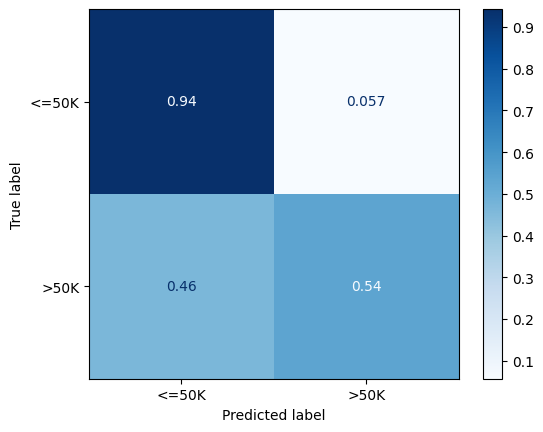

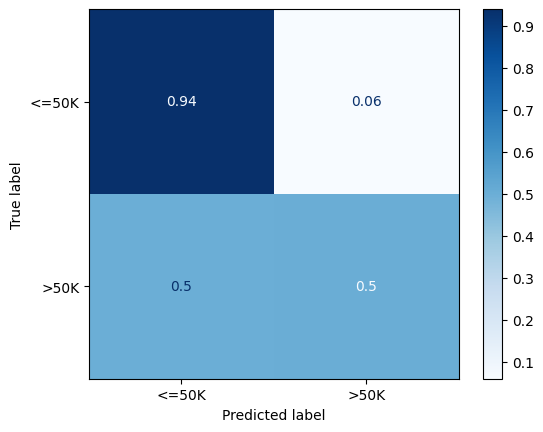

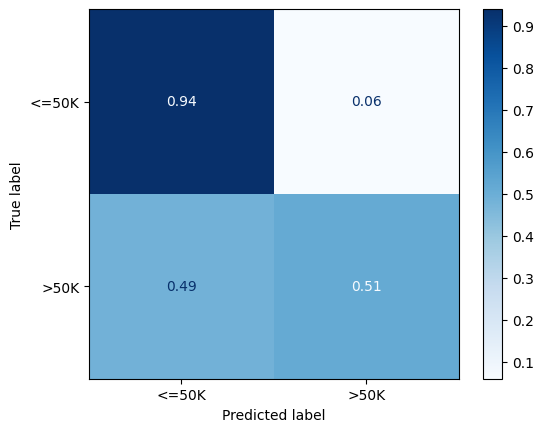

In [44]:
# Solution
ConfusionMatrixDisplay.from_estimator(rf7, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf7, X_val, y_val, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf7, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

## 10.  Features Importance


**[10.1]** Task: Print the features importance of rf7

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Print the features importance of rf7

In [45]:
# Solution
rf7.feature_importances_

array([1.04343755e-01, 2.15039794e-01, 7.17979454e-02, 2.57047139e-03,
       2.85285775e-03, 1.95509711e-03, 0.00000000e+00, 4.33899883e-03,
       5.36726524e-03, 7.80846959e-03, 1.29962574e-03, 0.00000000e+00,
       1.10211148e-02, 2.33553613e-05, 1.83574720e-01, 1.38535428e-04,
       4.60262285e-02, 1.01856834e-03, 9.02378116e-04, 2.89632354e-03,
       2.50580238e-03, 0.00000000e+00, 4.58264639e-03, 4.15059799e-02,
       8.88068241e-03, 3.58416179e-03, 4.28539254e-03, 1.14693226e-02,
       3.55200206e-05, 3.15665131e-02, 7.84374640e-04, 4.36604910e-03,
       3.96096561e-03, 2.10109910e-03, 9.52090403e-02, 2.93906698e-02,
       1.12671015e-03, 1.36073710e-02, 1.02458678e-02, 2.42393748e-02,
       2.51589775e-02, 1.84179745e-02])

**[10.2]** Let's create a Dataframe with these values

In [46]:
feat_imp_rf_df = pd.DataFrame(
    {'feature': X_train.columns,
     'feature_importance': rf7.feature_importances_
     }
     )

**[10.3]** Task: Sort the previous dataframe and reset its index

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Sort the previous dataframe and reset its index

In [47]:
# Solution
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

**[10.4]** Task: Display the first 10 rows of this dataframe

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Display the first 10 rows of this dataframe

In [48]:
# Solution
feat_imp_rf_df.head(10)

,feature,feature_importance
0,educational-num,0.215040
1,marital-status_Married-civ-spouse,0.183575
2,age,0.104344
3,relationship_Husband,0.095209
4,hours-per-week,0.071798
5,marital-status_Never-married,0.046026
6,occupation_Exec-managerial,0.041506
7,occupation_Prof-specialty,0.031567
8,relationship_Not-in-family,0.029391
9,gender_Female,0.025159


We can see the most important features are 'education_num' and 'marital_status_Married_civ_spouse'.

**[10.5]** We can visualise this information on a graph

In [49]:
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)